In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
data = pd.DataFrame(data= diabetes.data, columns=diabetes.feature_names) #type: ignore
data['target'] = diabetes.target #type: ignore
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
from sklearn.model_selection import train_test_split

X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_predict = rfr.predict(X_test)

In [7]:
from sklearn.metrics import r2_score, mean_squared_error

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predict)))
print('R2 score: ', r2_score(y_test, y_predict))

RMSE:  53.473274548857056
R2 score:  0.4703171406480713


In [8]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 200, 400], 'max_depth': [10, 20, 30],
        'min_samples_split': [2, 10, 100], 'min_samples_leaf': [1, 5, 10]}
grid = GridSearchCV(RandomForestRegressor(), params, cv=5, n_jobs= 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 100],
                         'n_estimators': [100, 200, 400]})

In [9]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(RandomForestRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=200),
 {'max_depth': 20,
  'min_samples_leaf': 10,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.40652011297539203)

In [10]:
y_predict = grid.predict(X_test) #type: ignore

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_predict)))
print('R2 score: ', r2_score(y_test, y_predict))

RMSE:  51.94937031714283
R2 score:  0.500077210232114


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


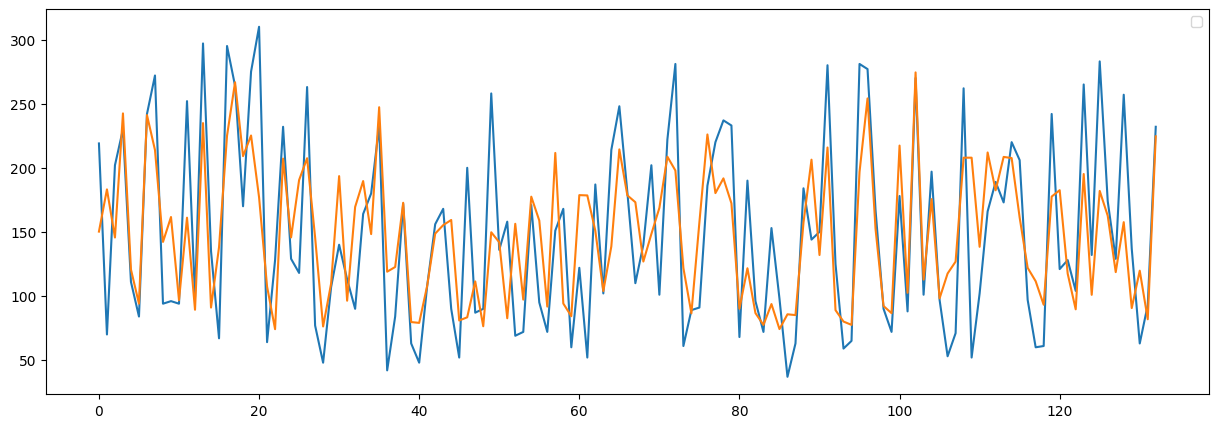

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(y_test)
plt.plot(y_predict)
plt.legend()